In [1]:
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd
from constants import *
from phe import pickle, query, download
import requests

In [2]:
specimen_date = 'date'
ltla = 'ltla'
nation = 'nation'

In [3]:
overview_data = query(
    filters={area_type: overview},
    structure=[release_timestamp, specimen_date, area_name, area_code,
               new_cases_by_specimen_date, new_admissions, new_deaths_by_death_date,
               new_virus_tests]
)
overview_data

,releaseTimestamp,date,areaName,areaCode,newCasesBySpecimenDate,newAdmissions,newDeaths28DaysByDeathDate,newVirusTests
0,2020-12-21,2020-12-20,United Kingdom,K02000001,1385,NaN,62.0,433470.0
1,2020-12-21,2020-12-19,United Kingdom,K02000001,9478,NaN,164.0,440584.0
2,2020-12-21,2020-12-18,United Kingdom,K02000001,23970,NaN,263.0,390130.0
3,2020-12-21,2020-12-17,United Kingdom,K02000001,30909,NaN,385.0,375185.0
4,2020-12-21,2020-12-16,United Kingdom,K02000001,34151,2034.0,349.0,364388.0
...,...,...,...,...,...,...,...,...
340,2020-12-21,2020-01-15,United Kingdom,K02000001,0,NaN,NaN,NaN
341,2020-12-21,2020-01-14,United Kingdom,K02000001,0,NaN,NaN,NaN
342,2020-12-21,2020-01-13,United Kingdom,K02000001,0,NaN,NaN,NaN
343,2020-12-21,2020-01-12,United Kingdom,K02000001,0,NaN,NaN,NaN


In [4]:
pickle('overview', overview_data)

PosixPath('/Users/chris/Downloads/phe_overview_2020-12-21_2020-12-21-20-44.pickle')

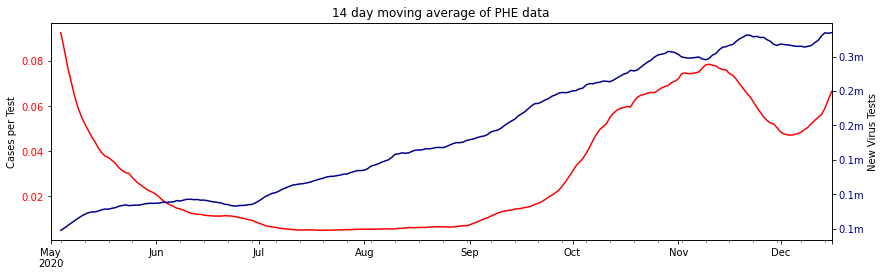

In [5]:
days = 14
overview_data.index = pd.to_datetime(overview_data[specimen_date])
overview_data.sort_index(inplace=True)
smoothed_overview_data = overview_data.rolling(window=days).mean()
trimmed = smoothed_overview_data.loc['2020-05-01':datetime.now()-timedelta(days=5)]
cases_per_test = (trimmed[new_cases_by_specimen_date] / trimmed[new_virus_tests])
ax = cases_per_test.plot(
    figsize=(14,4), color='r', title=f'{days} day moving average of PHE data'
)
ax.xaxis.label.set_visible(False)
ax.set_ylabel('Cases per Test')
ax.tick_params(axis='y', labelcolor='r')
ax2 = ax.twinx()
trimmed[new_virus_tests].plot(ax=ax2, color='darkblue')
ax2.set_ylabel('New Virus Tests')
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f"{y/1_000_000:.1f}m"))
ax2.tick_params(axis='y', labelcolor='darkblue')
plt.gcf().set_facecolor('white')

In [6]:
download('england', 'nation', new_admissions_sum, new_cases_sum, new_deaths_sum, unique_people_tested_sum, area_name='England')

PosixPath('/Users/chris/Downloads/england_2020-12-21.csv')

In [7]:
download('msoa', 'msoa', new_cases_sum, new_cases_rate, new_cases_change)

PosixPath('/Users/chris/Downloads/msoa_2020-12-21.csv')

In [8]:
area_data = query(
    filters={area_type: ltla}, 
    structure=[release_timestamp, specimen_date, area_name, area_code, new_cases_by_specimen_date, new_deaths_by_death_date],
    max_workers=10
)
area_data

,releaseTimestamp,date,areaName,areaCode,newCasesBySpecimenDate,newDeaths28DaysByDeathDate
0,2020-12-21,2020-12-20,Aberdeen City,S12000033,6.0,0.0
1,2020-12-21,2020-12-19,Aberdeen City,S12000033,20.0,0.0
2,2020-12-21,2020-12-18,Aberdeen City,S12000033,55.0,0.0
3,2020-12-21,2020-12-17,Aberdeen City,S12000033,68.0,0.0
4,2020-12-21,2020-12-16,Aberdeen City,S12000033,46.0,4.0
...,...,...,...,...,...,...
110545,2020-12-21,2020-10-14,Staffordshire Moorlands,E07000198,21.0,0.0
110546,2020-12-21,2020-10-13,Staffordshire Moorlands,E07000198,24.0,0.0
110547,2020-12-21,2020-10-12,Staffordshire Moorlands,E07000198,19.0,0.0
110548,2020-12-21,2020-10-11,Staffordshire Moorlands,E07000198,12.0,0.0


In [9]:
pickle('area', area_data)

PosixPath('/Users/chris/Downloads/phe_area_2020-12-21_2020-12-21-20-47.pickle')